# Data Preparation

## Import Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pandas_profiling import ProfileReport
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Import Data

dataset    
https://www.kaggle.com/wendykan/lending-club-loan-data

In [91]:
loan_data_backup = pd.read_csv('./bkup/loan_data_2007_2014.csv')

In [92]:
loan_data = loan_data_backup.copy()

In [99]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='obje

In [93]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# -------------------------------------------------------------------------
def remove_nulls(data, axis = 1, percent = 0.75):
# Remove rows and columns based on parameters provided.
    df = data.copy()
    ishape = df.shape
    if axis == 0:
        rownames = (df.transpose().isnull().sum()/df.shape[1])
        rownames = list(rownames[rownames.values > percent].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [95]:
# Drop the columns with % of null value > 90%, to be conservative.
loan_data = remove_nulls(loan_data, axis = 1, percent = 0.9)

Number of Columns dropped	:  17

Old dataset rows,columns (466285, 75) 
New dataset rows,columns (466285, 58)


In [96]:
# Drop the rows with % of null value > 90%, because the records cannot be reliable since too many features are missing.
loan_data = remove_nulls(loan_data, axis = 0, percent = 0.9)


Number of Rows dropped	:  0

Old dataset rows,columns (466285, 58) 
New dataset rows,columns (466285, 58)


In [97]:
# Let's look at # of unique values for each column.
# I will remove all columns where number of unique value is 1 
# Those columns will not give us any insights.
def remove_1unique(data):
    df = data.copy()
    ishape = df.shape
    uniques = df.nunique()
    unique = uniques[uniques.values == 1] 
    nomissings = df.isnull().sum()
    nomissing = nomissings[nomissings.values==0]
    df.drop(labels = list(nomissing.index.intersection(unique.index)), axis =1, inplace=True)
    print('Dropped columns:\n', list(unique.index))
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    
    
    return df

In [98]:
loan_data = remove_1unique(loan_data)

Dropped columns:
 ['policy_code', 'application_type']

Old dataset rows,columns (466285, 58) 
New dataset rows,columns (466285, 56)


In [7]:
# profile = ProfileReport(loan_data, title='Pandas Profiling Report', explorative=True)

In [8]:
# profile.to_notebook_iframe()

In [9]:
# profile.to_widgets()

In [86]:
loan_data.funded_amnt.sum(), loan_data.loan_amnt.sum(),loan_data.tot_cur_bal.sum()

(6664052450, 6675931775, 54966727716.0)

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
round(loan_data.isnull().sum().sort_values(ascending = False)/len(loan_data)*100)

inq_last_12m                   100.0
dti_joint                      100.0
annual_inc_joint               100.0
total_cu_tl                    100.0
open_acc_6m                    100.0
open_il_6m                     100.0
open_il_12m                    100.0
open_il_24m                    100.0
mths_since_rcnt_il             100.0
total_bal_il                   100.0
il_util                        100.0
open_rv_12m                    100.0
open_rv_24m                    100.0
max_bal_bc                     100.0
all_util                       100.0
inq_fi                         100.0
verification_status_joint      100.0
mths_since_last_record          87.0
mths_since_last_major_derog     79.0
desc                            73.0
mths_since_last_delinq          54.0
next_pymnt_d                    49.0
tot_cur_bal                     15.0
total_rev_hi_lim                15.0
tot_coll_amt                    15.0
emp_title                        6.0
emp_length                       5.0
l

In [11]:
loan_data.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124436
purpose                            14
title                           63099
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

## Explore Data

In [12]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
loan_data.issue_d.min(), loan_data.issue_d.max()

('Apr-08', 'Sep-14')

In [14]:
# remove max column limitation for display
pd.options.display.max_columns = None

In [15]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# loan_data.columns.values

In [17]:
# loan_data.info()

## General Preprocessing

### Preprocessing few continuous variables

In [18]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
loan_data.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [20]:
# convert emp_length variable from string to numeric
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [21]:
loan_data.emp_length_int.head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length_int, dtype: object

In [22]:
type(loan_data['emp_length_int'][0])

str

In [23]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [24]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [25]:
# loan_data['earliest_cr_line']

In [26]:
type(loan_data['earliest_cr_line'][0])

str

In [27]:
# Convert earliest_cr_line variable from string to time stamp
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [28]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
# pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

In [30]:
# Calculate months after credit line issued
loan_data['mths_since_earliest_cr_line'] = \
round(pd.to_numeric((pd.to_datetime('2015-01-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [31]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        204.482430
std          93.974829
min        -647.000000
25%         148.000000
50%         190.000000
75%         250.000000
max         552.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [32]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']]\
[loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-572.0
1770,Sep-68,2068-09-01,-644.0
2799,Sep-64,2064-09-01,-596.0
3282,Sep-67,2067-09-01,-632.0
3359,Feb-65,2065-02-01,-601.0
3413,Jun-67,2067-06-01,-629.0
3607,Aug-67,2067-08-01,-631.0
3989,Dec-63,2063-12-01,-587.0
4440,Sep-68,2068-09-01,-644.0
4449,Sep-68,2068-09-01,-644.0


In [33]:
# Handle outliers
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] =\
loan_data['mths_since_earliest_cr_line'].max()

In [34]:
min(loan_data['mths_since_earliest_cr_line'])

38.0

In [35]:
# loan_data['term']

In [36]:
loan_data['term'].describe(),loan_data['term'].unique()

(count         466285
 unique             2
 top        36 months
 freq          337953
 Name: term, dtype: object,
 array([' 36 months', ' 60 months'], dtype=object))

In [37]:
# convert term variable from string to numeric
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [38]:
# loan_data['term_int']

In [39]:
type(loan_data['term_int'][25])

str

In [40]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term_int'];

In [41]:
type(loan_data['term_int'][0])

numpy.int64

In [42]:
loan_data['issue_d'];

In [43]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('today') -\
                                                       loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         88.261947
std          14.353893
min          73.000000
25%          78.000000
50%          84.000000
75%          94.000000
max         163.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [44]:
# loan_data.info()

In [45]:
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [46]:
# # create dummy variables for grade vaiable
# pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':');

In [47]:
# create dummy variables for 
# grade/sub_grade/home_ownership/verification_status/loan_status/purpose/addr_state/initial_list_status
# vaiables
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [48]:
type(loan_data_dummies)

list

In [49]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [50]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [51]:
loan_data_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [53]:
len(loan_data.columns)

207

### Check for missing values and clean

In [54]:
# loan_data.isnull()

In [55]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [56]:
pd.options.display.max_rows = 100

In [57]:
loan_data['total_rev_hi_lim'].describe()

count    3.960090e+05
mean     3.037909e+04
std      3.724713e+04
min      0.000000e+00
25%      1.350000e+04
50%      2.280000e+04
75%      3.790000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [58]:
loan_data['funded_amnt'].describe()

count    466285.000000
mean      14291.801044
std        8274.371300
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [59]:
# fill na in total_rev_hi_lim variable with funded_amnt variable
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [60]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

### Deal with missing value

In [61]:
# fill na in annual_inc variable with mean
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [62]:
# fill na in below variables with 0
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [63]:
loan_data.grade.isnull().sum()

0

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [64]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [65]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [66]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [67]:
# Define good/bad loans
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

In [68]:
loan_data['good_bad'].value_counts()/len(loan_data)

1    0.890693
0    0.109307
Name: good_bad, dtype: float64

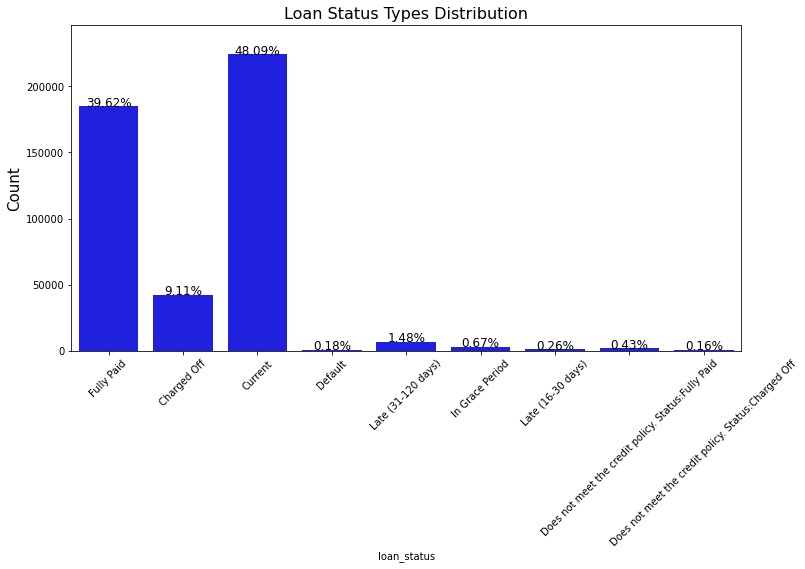

In [71]:
df_loan = loan_data
total = len(df_loan)

plt.figure(figsize = (12,6))

g = sns.countplot(x="loan_status", data=df_loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
# g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=16)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [81]:
df_loan.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:UT', 'addr_state:VA', 'addr_state:VT', 'addr_state:WA',
       'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w', 'good_bad'],
      dtype='object', length=208)

In [84]:
df_loan.tot_cur_bal.sum()

54966727716.0

In [80]:
df_loan['loan_amnt'].sum()

6675931775

In [79]:
df_loan.groupby(['loan_status'])['loan_amnt'].sum()

loan_status
Charged Off                                             616684275
Current                                                3403160175
Default                                                  12717025
Does not meet the credit policy. Status:Charged Off       7250225
Does not meet the credit policy. Status:Fully Paid       17600225
Fully Paid                                             2441213975
In Grace Period                                          50739600
Late (16-30 days)                                        19245350
Late (31-120 days)                                      107320925
Name: loan_amnt, dtype: int64

In [399]:
df_loan["loan_amnt"].describe().round(1)

count    466285.0
mean      14317.3
std        8286.5
min         500.0
25%        8000.0
50%       12000.0
75%       20000.0
max       35000.0
Name: loan_amnt, dtype: float64

In [403]:
df_loan.groupby(['int_round'])['loan_amount'].sum()

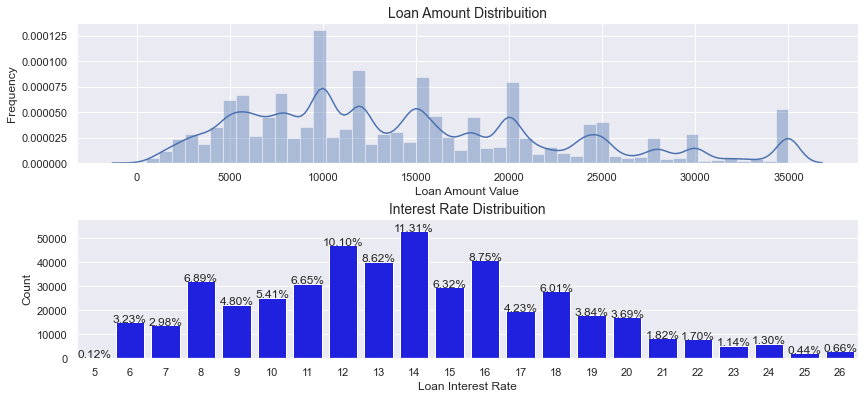

In [394]:
df_loan['int_round'] = df_loan['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,6))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df_loan["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Loan Amount Distribuition", fontsize=14)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df_loan, 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Interest Rate Distribuition", fontsize=14)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

### Splitting Data

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test =\
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 123)

In [174]:
loan_data_inputs_train.shape

(373028, 207)

In [175]:
loan_data_targets_train.shape

(373028,)

In [176]:
loan_data_inputs_test.shape

(93257, 207)

In [177]:
loan_data_targets_test.shape

(93257,)

======================================

### Data Preparation: An Example

======================================


#### Fine classing    
Splitting a variable into roughtly equal categories according to an inteneral criteria, sucha as the values of the variable or the number of cases in each category
#### Coarse classing   
Splitting a variable into categories according to an exteneral criteria that show how much the categories explain another varible, such as woe.    

#### Weight of Evidence (WOE)   


#### Information Value (IV)   

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\   
=============================================

In [178]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Process loan_data_inputs_train, and then process loan_data_inputs_test
# Process Train and Test seperately!
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
# df_inputs_prepr = loan_data_inputs_test
# df_targets_prepr = loan_data_targets_test

In [179]:
# df_inputs_train = loan_data_inputs_train
# df_targets_train = loan_data_targets_train
# df_inputs_test = loan_data_inputs_test
# df_targets_test = loan_data_targets_test

In [187]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # calculate pair-wise correlations between them
# corrmat = df_inputs_prepr.select_dtypes(include=['float64']).corr()
# plt.figure(figsize=(10,10))

# mask = np.zeros_like(corrmat)
# mask[np.triu_indices_from(mask)] = True

# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(12, 8))
#     ax = sns.heatmap(corrmat, mask=mask, cmap = "coolwarm", square=True, linewidths=.2, annot=True, fmt="2.1f");
# plt.title('Pair-wise correlation of features', fontsize=20);

### Preprocessing Discrete Variables: Automating Calculaions

In [188]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Discrete Variables: Creating Dummy Variables - grade

In [189]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2667,0.725534,0.007150,1935.0,732.0,0.005826,0.017899,-1.122446,NaN,NaN,0.288987
1,F,10636,0.760248,0.028513,8086.0,2550.0,0.024346,0.062355,-0.940487,0.034714,0.181959,0.288987
2,E,28639,0.805545,0.076774,23070.0,5569.0,0.069460,0.136178,-0.673210,0.045297,0.267277,0.288987
3,D,61406,0.844950,0.164615,51885.0,9521.0,0.156218,0.232816,-0.398998,0.039405,0.274212,0.288987
4,C,100251,0.884570,0.268749,88679.0,11572.0,0.266998,0.282969,-0.058093,0.039620,0.340905,0.288987
5,B,109526,0.921315,0.293613,100908.0,8618.0,0.303818,0.210735,0.365828,0.036746,0.423921,0.288987
6,A,59903,0.961054,0.160586,57570.0,2333.0,0.173334,0.057049,1.111319,0.039738,0.745490,0.288987


### Preprocessing Discrete Variables: Visualizing Results

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [191]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

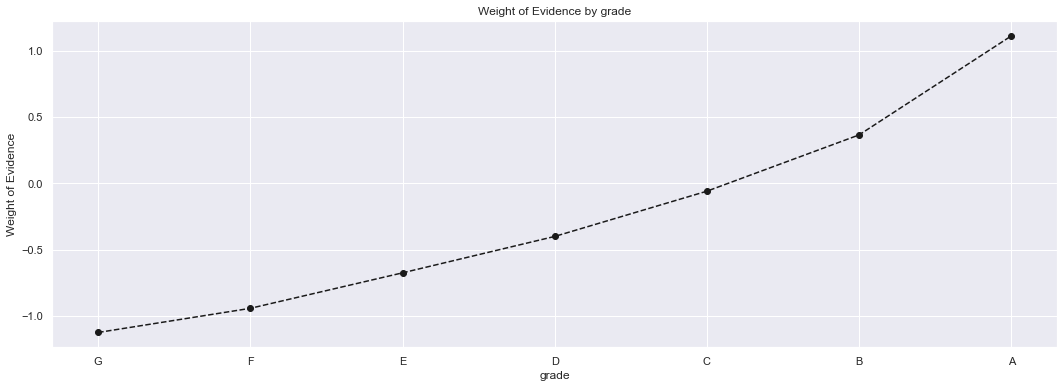

In [192]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables - home_ownership

In [193]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,147,0.802721,0.000394,118.0,29.0,0.000355,0.000709,-0.691139,NaN,NaN,inf
1,NONE,37,0.864865,0.000099,32.0,5.0,0.000096,0.000122,-0.238230,0.062144,0.452909,inf
2,RENT,150819,0.873869,0.404310,131796.0,19023.0,0.396817,0.465167,-0.158921,0.009004,0.079309,inf
3,OWN,33460,0.891512,0.089698,29830.0,3630.0,0.089813,0.088764,0.011754,0.017644,0.170675,inf
4,MORTGAGE,188564,0.903439,0.505496,170356.0,18208.0,0.512915,0.445238,0.141502,0.011926,0.129747,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096561,inf,inf


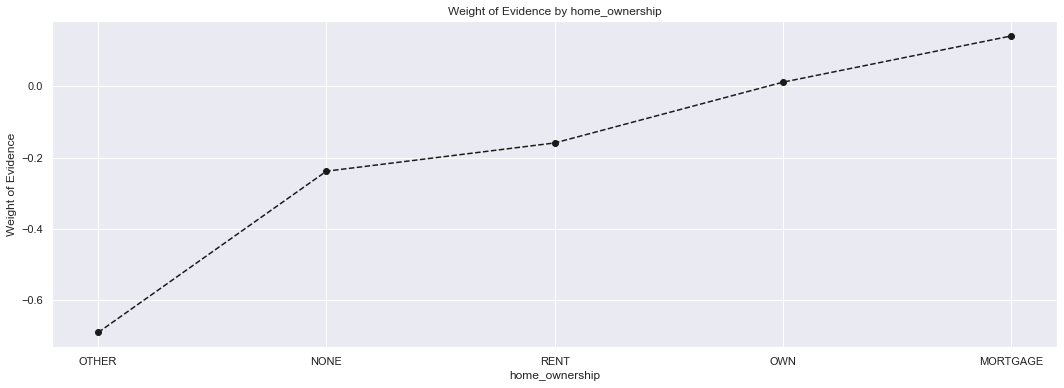

In [194]:
plot_by_woe(df_temp)

In [195]:
df_inputs_prepr.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [196]:
df_inputs_prepr['home_ownership_RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

### Preprocessing Discrete Variables: Creating Dummy Variables - addr_state

In [197]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'NJ', 'FL', 'IL', 'SC', 'VA', 'GA', 'PA', 'NV', 'NY', 'WA',
       'NM', 'OH', 'WI', 'AR', 'AL', 'OK', 'NH', 'CT', 'MD', 'LA', 'TN',
       'HI', 'TX', 'MI', 'MA', 'NC', 'AZ', 'OR', 'CO', 'UT', 'MN', 'MT',
       'IN', 'MO', 'KY', 'SD', 'DC', 'DE', 'WV', 'AK', 'KS', 'RI', 'MS',
       'VT', 'WY', 'NE', 'IA', 'ID', 'ME'], dtype=object)

In [198]:
df_inputs_prepr.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [199]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.384615,0.000035,5.0,8.0,0.000015,0.000196,-2.564531,NaN,NaN,inf
1,IA,10,0.700000,0.000027,7.0,3.0,0.000021,0.000073,-1.247230,0.315385,1.317301,inf
2,NV,5194,0.862534,0.013924,4480.0,714.0,0.013489,0.017459,-0.258032,0.162534,0.989198,inf
3,AL,4672,0.872860,0.012525,4078.0,594.0,0.012278,0.014525,-0.168045,0.010326,0.089987,inf
4,HI,2004,0.874251,0.005372,1752.0,252.0,0.005275,0.006162,-0.155444,0.001392,0.012602,inf
5,ID,8,0.875000,0.000021,7.0,1.0,0.000021,0.000024,-0.148618,0.000749,0.006826,inf
6,FL,25463,0.875074,0.068260,22282.0,3181.0,0.067088,0.077785,-0.147944,0.000074,0.000673,inf
7,OK,3257,0.879030,0.008731,2863.0,394.0,0.008620,0.009634,-0.111253,0.003956,0.036691,inf
8,NY,32193,0.881247,0.086302,28370.0,3823.0,0.085418,0.093483,-0.090231,0.002218,0.021022,inf
9,NM,2038,0.881747,0.005463,1797.0,241.0,0.005410,0.005893,-0.085451,0.000499,0.004780,inf


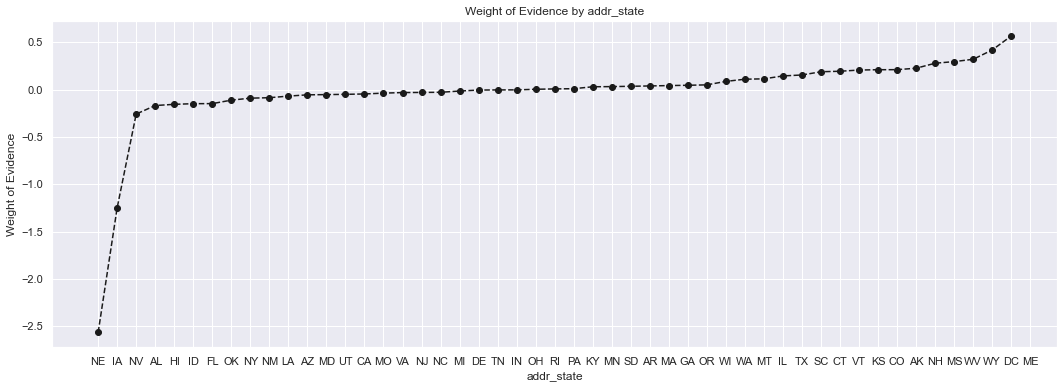

In [200]:
plot_by_woe(df_temp)

In [201]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0
    
# if ['addr_state_NE'] in df_inputs_prepr.columns.values:
#     pass
# else:
#     df_inputs_prepr['addr_state_NE'] = 0

# if ['addr_state_IA'] in df_inputs_prepr.columns.values:
#     pass
# else:
#     df_inputs_prepr['addr_state_IA'] = 0
    
# if ['addr_state_IA'] in df_inputs_prepr.columns.values:
#     pass
# else:
#     df_inputs_prepr['addr_state_NV'] = 0    

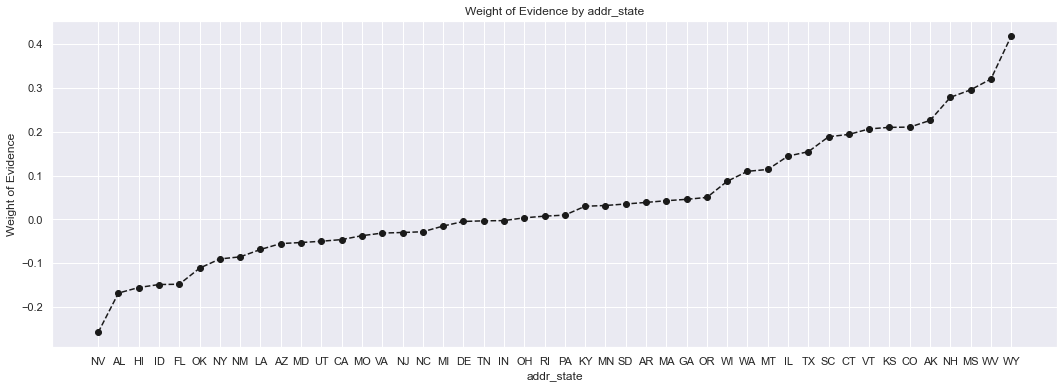

In [202]:
plot_by_woe(df_temp.iloc[2: -2, :])

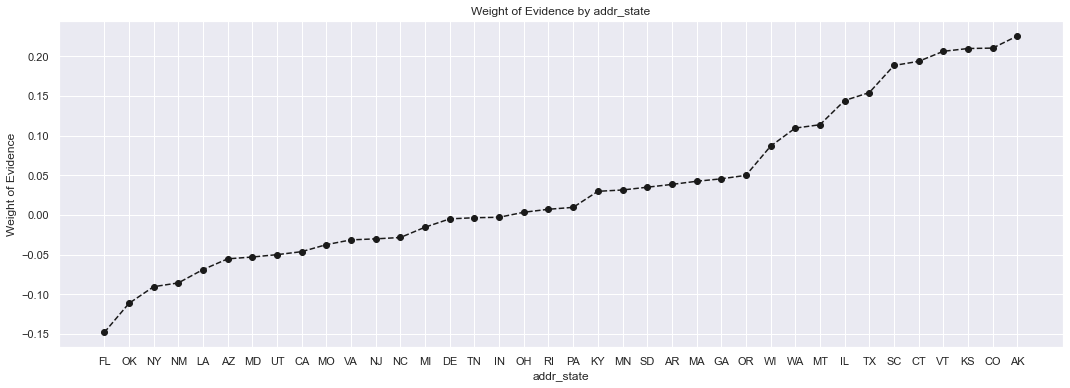

In [203]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [204]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables: Creating Dummy Variables - verification_status

In [205]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134706,0.872886,0.361115,117583.0,17123.0,0.354024,0.418706,-0.167806,NaN,NaN,0.019491
1,Source Verified,119941,0.895407,0.321534,107396.0,12545.0,0.323352,0.306761,0.052673,0.022521,0.220479,0.019491
2,Not Verified,118381,0.905162,0.317352,107154.0,11227.0,0.322624,0.274532,0.161418,0.009755,0.108745,0.019491


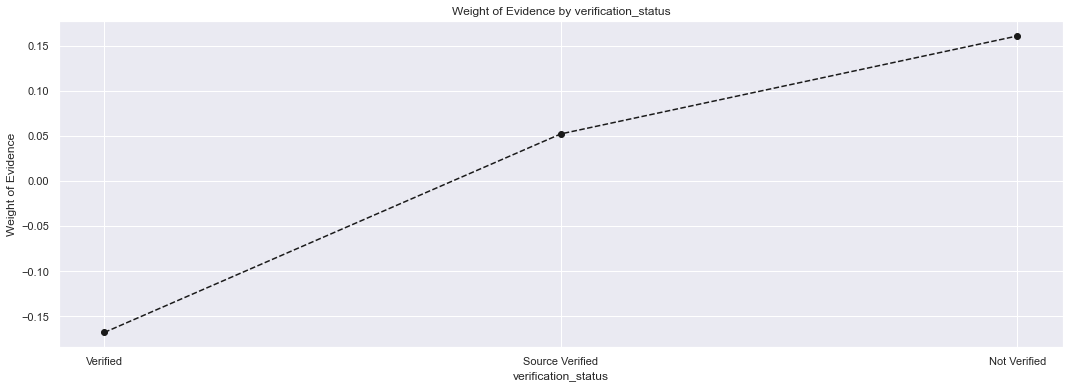

In [206]:
plot_by_woe(df_temp)

In [207]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,342,0.783626,0.000917,268.0,74.0,0.000807,0.001810,-0.807606,NaN,NaN,0.036471
1,small_business,5613,0.783895,0.015047,4400.0,1213.0,0.013248,0.029661,-0.806020,0.000269,0.001586,0.036471
2,moving,2424,0.841997,0.006498,2041.0,383.0,0.006145,0.009365,-0.421368,0.058102,0.384652,0.036471
3,renewable_energy,284,0.855634,0.000761,243.0,41.0,0.000732,0.001003,-0.315038,0.013637,0.106329,0.036471
4,house,1803,0.856905,0.004833,1545.0,258.0,0.004652,0.006309,-0.304708,0.001271,0.010330,0.036471
5,other,18909,0.862605,0.050691,16311.0,2598.0,0.049110,0.063529,-0.257430,0.005700,0.047278,0.036471
6,medical,3717,0.867097,0.009964,3223.0,494.0,0.009704,0.012080,-0.218995,0.004492,0.038435,0.036471
7,wedding,1859,0.878429,0.004984,1633.0,226.0,0.004917,0.005526,-0.116889,0.011332,0.102107,0.036471
8,vacation,2001,0.880060,0.005364,1761.0,240.0,0.005302,0.005869,-0.101529,0.001631,0.015359,0.036471
9,debt_consolidation,219370,0.886571,0.588079,194487.0,24883.0,0.585570,0.608461,-0.038347,0.006511,0.063182,0.036471


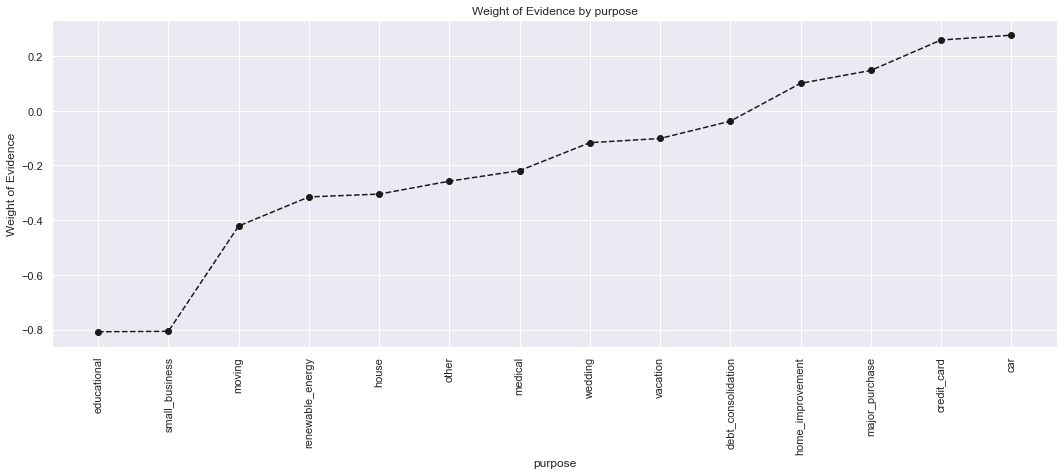

In [208]:
plot_by_woe(df_temp, 90)

In [209]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [210]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242391,0.879389,0.649793,213156.0,29235.0,0.641779,0.71488,-0.107870,NaN,NaN,0.02457
1,w,130637,0.910745,0.350207,118977.0,11660.0,0.358221,0.28512,0.228238,0.031356,0.336108,0.02457


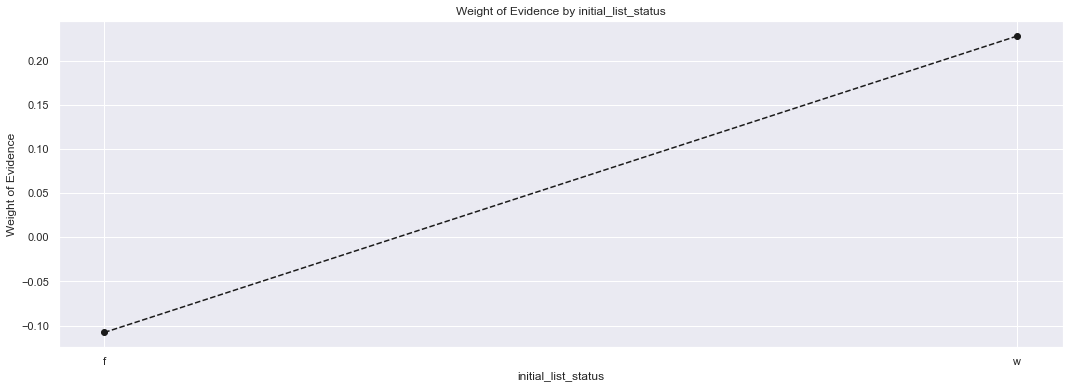

In [211]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [212]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [213]:
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [214]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270367,0.902636,0.72479,244043.0,26324.0,0.734775,0.643697,0.132336,NaN,NaN,0.038939
1,60,102661,0.858067,0.27521,88090.0,14571.0,0.265225,0.356303,-0.295202,0.044569,0.427538,0.038939


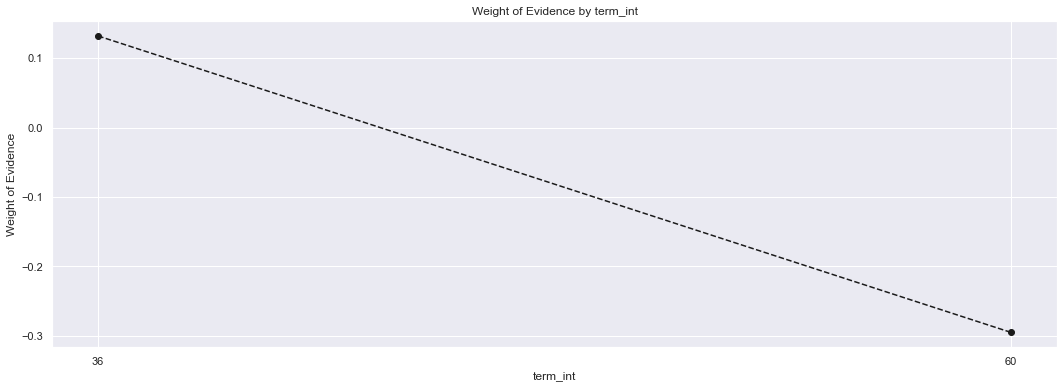

In [215]:
plot_by_woe(df_temp)

In [216]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [217]:
df_inputs_prepr['emp_length_int'].unique()

array([ 2.,  3., 10.,  8.,  4.,  0.,  6.,  5.,  7.,  1.,  9.])

In [218]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45883,0.875815,0.123001,40185.0,5698.0,0.120991,0.139332,-0.141149,NaN,NaN,0.006554
1,1.0,23716,0.887123,0.063577,21039.0,2677.0,0.063345,0.065460,-0.032847,0.011308,0.108303,0.006554
2,2.0,33138,0.889462,0.088835,29475.0,3663.0,0.088745,0.089571,-0.009268,0.002340,0.023579,0.006554
3,3.0,29183,0.889628,0.078233,25962.0,3221.0,0.078167,0.078763,-0.007586,0.000165,0.001682,0.006554
4,4.0,22340,0.890242,0.059888,19888.0,2452.0,0.059880,0.059958,-0.001315,0.000614,0.006270,0.006554
5,5.0,24663,0.884686,0.066116,21819.0,2844.0,0.065694,0.069544,-0.056958,0.005556,0.055643,0.006554
6,6.0,20909,0.882204,0.056052,18446.0,2463.0,0.055538,0.060227,-0.081060,0.002482,0.024102,0.006554
7,7.0,20889,0.889942,0.055998,18590.0,2299.0,0.055972,0.056217,-0.004378,0.007738,0.076682,0.006554
8,8.0,17966,0.892853,0.048163,16041.0,1925.0,0.048297,0.047072,0.025694,0.002911,0.030072,0.006554
9,9.0,14179,0.885747,0.038011,12559.0,1620.0,0.037813,0.039614,-0.046516,0.007107,0.072211,0.006554


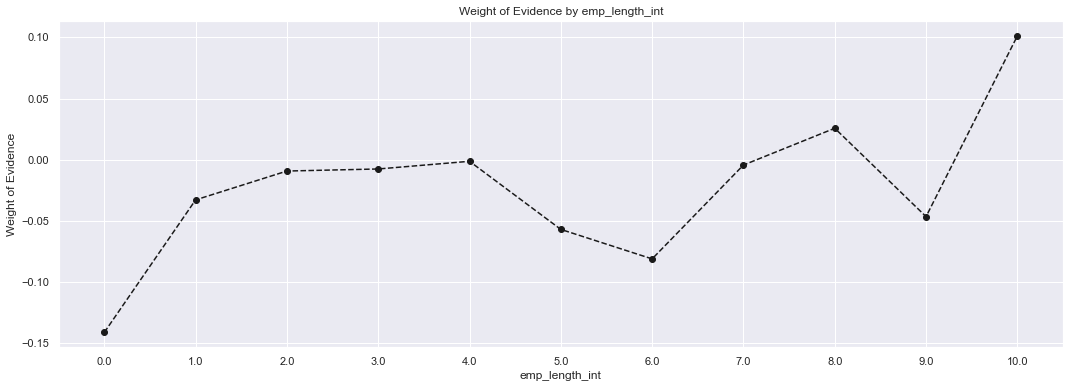

In [219]:
plot_by_woe(df_temp)

In [220]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [221]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 75.,  78.,  86.,  85.,  88.,  84.,  79., 113.,  90., 106.,  81.,
        74., 110.,  93.,  99.,  82.,  77., 105.,  83.,  92., 101.,  96.,
        76., 142., 102.,  97.,  95.,  89.,  80.,  91.,  98.,  87.,  94.,
       103., 107., 100., 108., 136.,  73., 123., 109., 146., 117., 122.,
       124., 112., 145., 119., 104., 121., 116., 120., 114., 115., 118.,
       134., 129., 141., 154., 135., 153., 133., 125., 140., 127., 162.,
       111., 131., 132., 139., 155., 151., 157., 128., 156., 147., 137.,
       130., 126., 158., 161., 138., 150., 143., 144., 163., 159., 149.,
       160., 152., 148.])

In [222]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [223]:
df_inputs_prepr['mths_since_issue_d_factor']

288319      (74.8, 76.6]
295094      (74.8, 76.6]
346155      (76.6, 78.4]
68062       (85.6, 87.4]
43572       (83.8, 85.6]
               ...      
192476     (98.2, 100.0]
17730     (116.2, 118.0]
28030     (125.2, 127.0]
277869      (74.8, 76.6]
249342     (72.91, 74.8]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(72.91, 74.8] < (74.8, 76.6] < (76.6, 78.4] < (78.4, 80.2] ... (155.8, 157.6] < (157.6, 159.4] < (159.4, 161.2] < (161.2, 163.0]]

In [224]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(72.91, 74.8]",28397,0.941966,0.076126,26749.0,1648.0,0.080537,0.040298,0.692407,NaN,NaN,0.114351
1,"(74.8, 76.6]",39563,0.928014,0.106059,36715.0,2848.0,0.110543,0.069642,0.462041,0.013952,0.230366,0.114351
2,"(76.6, 78.4]",38360,0.918170,0.102834,35221.0,3139.0,0.106045,0.076758,0.323211,0.009844,0.138830,0.114351
3,"(78.4, 80.2]",29010,0.908032,0.077769,26342.0,2668.0,0.079312,0.065240,0.195308,0.010138,0.127903,0.114351
4,"(80.2, 82.0]",28448,0.902137,0.076262,25664.0,2784.0,0.077270,0.068077,0.126673,0.005894,0.068635,0.114351
5,"(82.0, 83.8]",12217,0.899075,0.032751,10984.0,1233.0,0.033071,0.030150,0.092462,0.003062,0.034211,0.114351
6,"(83.8, 85.6]",24583,0.896677,0.065901,22043.0,2540.0,0.066368,0.062110,0.066303,0.002398,0.026158,0.114351
7,"(85.6, 87.4]",23032,0.888069,0.061743,20454.0,2578.0,0.061584,0.063039,-0.023363,0.008608,0.089666,0.114351
8,"(87.4, 89.2]",20545,0.879971,0.055076,18079.0,2466.0,0.054433,0.060301,-0.102374,0.008098,0.079011,0.114351
9,"(89.2, 91.0]",18210,0.867600,0.048817,15799.0,2411.0,0.047568,0.058956,-0.214623,0.012371,0.112249,0.114351


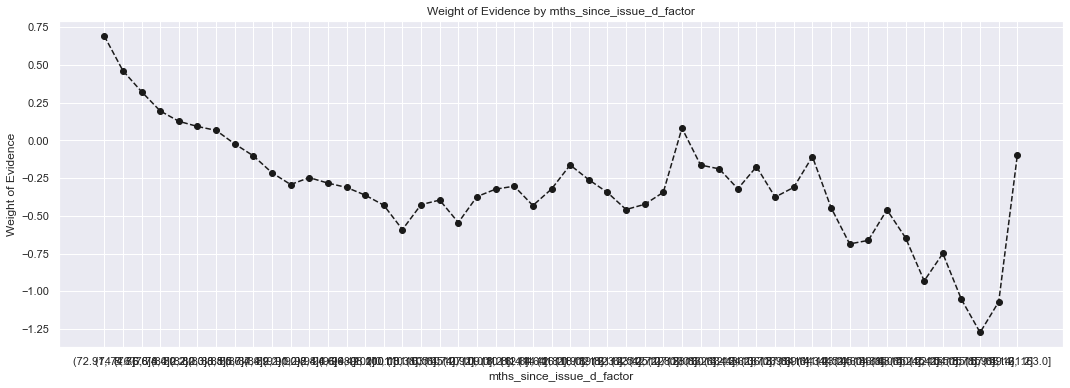

In [225]:
plot_by_woe(df_temp)

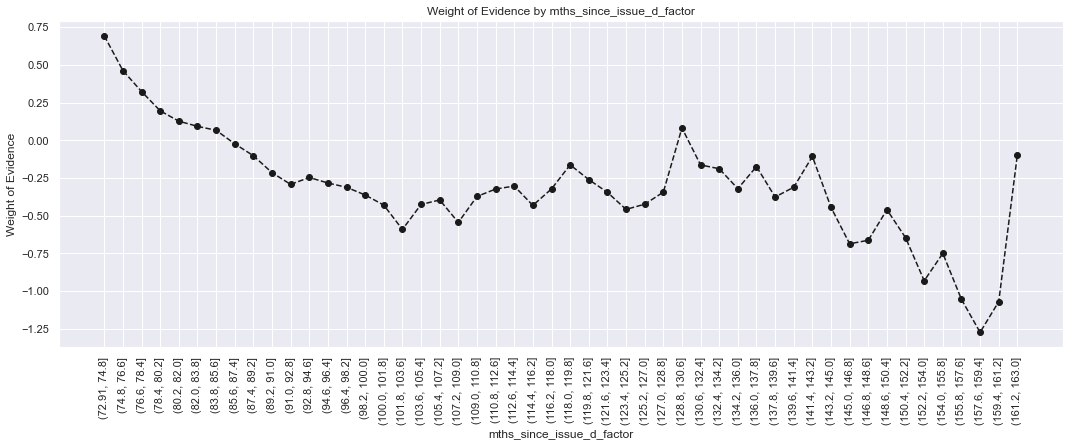

In [226]:
plot_by_woe(df_temp, 90)

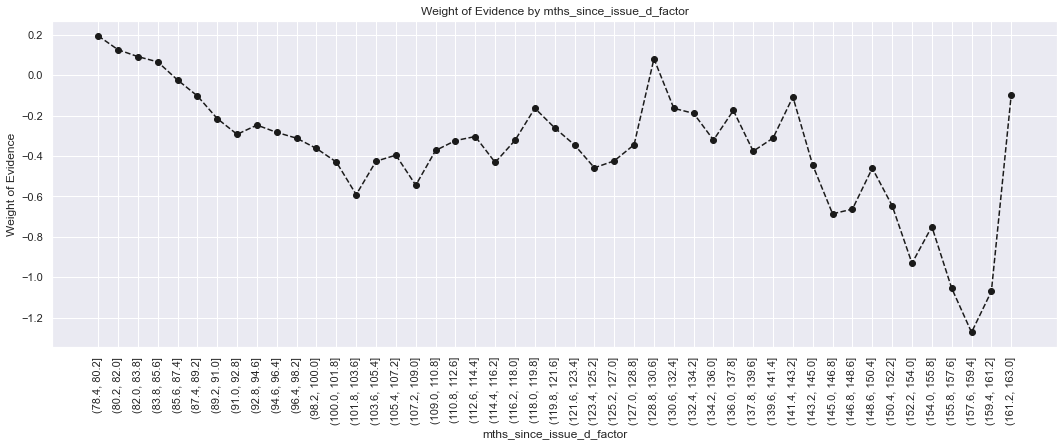

In [227]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [228]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [229]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [230]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",800,0.960000,0.002145,768.0,32.0,0.002312,0.000782,1.083526,NaN,NaN,0.342008
1,"(5.833, 6.246]",8400,0.980238,0.022518,8234.0,166.0,0.024791,0.004059,1.809512,0.020238,0.725986,0.342008
2,"(6.246, 6.658]",7872,0.971164,0.021103,7645.0,227.0,0.023018,0.005551,1.422329,0.009074,0.387182,0.342008
3,"(6.658, 7.071]",1824,0.966557,0.004890,1763.0,61.0,0.005308,0.001492,1.269371,0.004607,0.152959,0.342008
4,"(7.071, 7.484]",3111,0.975571,0.008340,3035.0,76.0,0.009138,0.001858,1.592706,0.009014,0.323335,0.342008
5,"(7.484, 7.897]",12654,0.963253,0.033922,12189.0,465.0,0.036699,0.011371,1.171724,0.012318,0.420982,0.342008
6,"(7.897, 8.31]",9703,0.950737,0.026011,9225.0,478.0,0.027775,0.011688,0.865534,0.012516,0.306190,0.342008
7,"(8.31, 8.722]",6650,0.964060,0.017827,6411.0,239.0,0.019303,0.005844,1.194779,0.013323,0.329245,0.342008
8,"(8.722, 9.135]",9538,0.938037,0.025569,8947.0,591.0,0.026938,0.014452,0.622730,0.026023,0.572049,0.342008
9,"(9.135, 9.548]",6623,0.965122,0.017755,6392.0,231.0,0.019245,0.005649,1.225857,0.027084,0.603127,0.342008


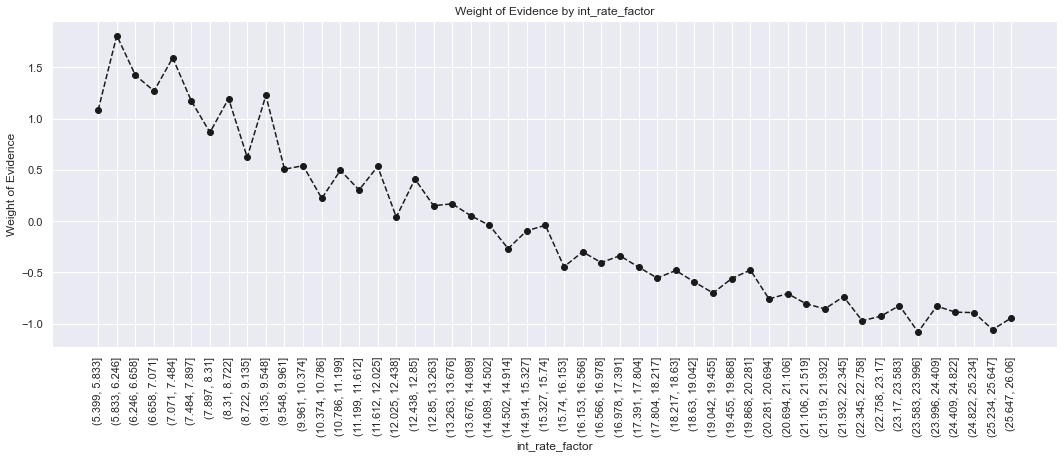

In [231]:
plot_by_woe(df_temp, 90)

In [232]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [233]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1235,0.898785,0.003311,1110.0,125.0,0.003342,0.003057,0.089274,NaN,NaN,0.014083
1,"(1190.0, 1880.0]",3069,0.898012,0.008227,2756.0,313.0,0.008298,0.007654,0.080805,0.000773,0.008469,0.014083
2,"(1880.0, 2570.0]",6034,0.894100,0.016176,5395.0,639.0,0.016243,0.015625,0.038796,0.003912,0.042009,0.014083
3,"(2570.0, 3260.0]",7206,0.890785,0.019318,6419.0,787.0,0.019327,0.019244,0.004262,0.003315,0.034534,0.014083
4,"(3260.0, 3950.0]",4798,0.887245,0.012862,4257.0,541.0,0.012817,0.013229,-0.031627,0.003541,0.035889,0.014083
5,"(3950.0, 4640.0]",9041,0.890167,0.024237,8048.0,993.0,0.024231,0.024282,-0.002079,0.002922,0.029548,0.014083
6,"(4640.0, 5330.0]",15837,0.893225,0.042455,14146.0,1691.0,0.042591,0.041350,0.029584,0.003058,0.031664,0.014083
7,"(5330.0, 6020.0]",17180,0.904889,0.046056,15546.0,1634.0,0.046807,0.039956,0.158245,0.011665,0.128661,0.014083
8,"(6020.0, 6710.0]",6907,0.883741,0.018516,6104.0,803.0,0.018378,0.019636,-0.066183,0.021148,0.224428,0.014083
9,"(6710.0, 7400.0]",11687,0.898434,0.031330,10500.0,1187.0,0.031614,0.029026,0.085418,0.014693,0.151601,0.014083


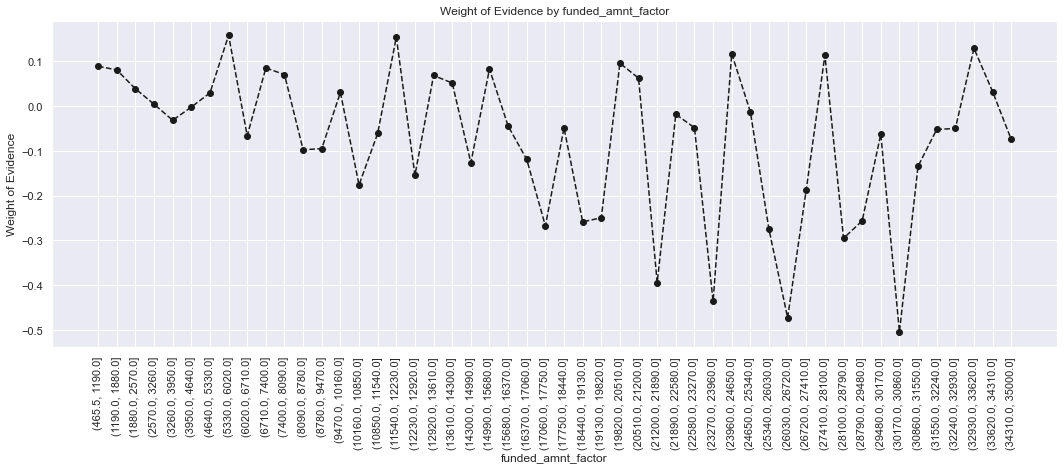

In [234]:
plot_by_woe(df_temp, 90)

### Data Preparation: Continuous Variables

In [235]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.552, 11.04]",26,0.923077,0.000070,24.0,2.0,0.000072,0.000049,0.390379,NaN,NaN,0.016819
1,"(11.04, 22.08]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016819
2,"(22.08, 33.12]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016819
3,"(33.12, 44.16]",391,0.897698,0.001048,351.0,40.0,0.001057,0.000978,0.077379,NaN,NaN,0.016819
4,"(44.16, 55.2]",1770,0.902260,0.004745,1597.0,173.0,0.004808,0.004230,0.128063,0.004562,0.050684,0.016819
5,"(55.2, 66.24]",2448,0.859477,0.006563,2104.0,344.0,0.006335,0.008412,-0.283574,0.042783,0.411637,0.016819
6,"(66.24, 77.28]",3532,0.872877,0.009468,3083.0,449.0,0.009282,0.010979,-0.167892,0.013399,0.115682,0.016819
7,"(77.28, 88.32]",6621,0.860746,0.017749,5699.0,922.0,0.017159,0.022546,-0.273027,0.012130,0.105135,0.016819
8,"(88.32, 99.36]",9913,0.861091,0.026574,8536.0,1377.0,0.025701,0.033672,-0.270142,0.000345,0.002885,0.016819
9,"(99.36, 110.4]",12004,0.871626,0.032180,10463.0,1541.0,0.031502,0.037682,-0.179114,0.010535,0.091028,0.016819


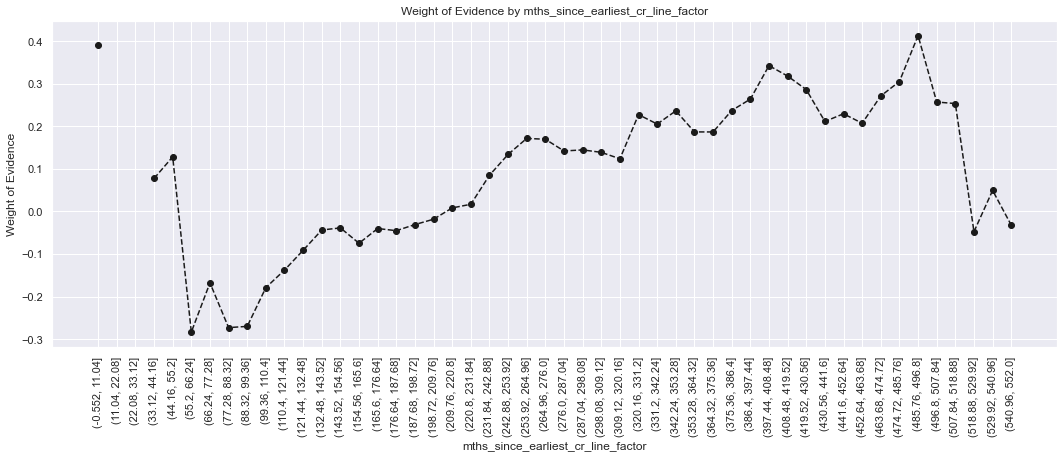

In [236]:
plot_by_woe(df_temp, 90)

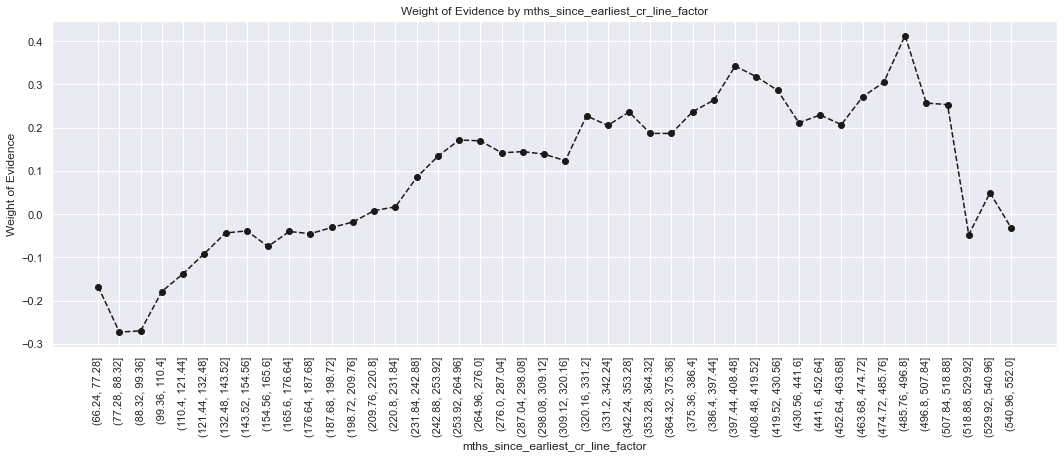

In [237]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [238]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [239]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306218,0.890219,0.820898,272601.0,33617.0,0.820759,0.822032,-0.001550,NaN,NaN,inf
1,1.0,45130,0.892289,0.120983,40269.0,4861.0,0.121244,0.118865,0.019810,0.002070,0.021360,inf
2,2.0,13003,0.888333,0.034858,11551.0,1452.0,0.034778,0.035506,-0.020698,0.003955,0.040508,inf
3,3.0,4570,0.885996,0.012251,4049.0,521.0,0.012191,0.012740,-0.044053,0.002338,0.023355,inf
4,4.0,1906,0.898216,0.005110,1712.0,194.0,0.005155,0.004744,0.083032,0.012221,0.127084,inf
5,5.0,1002,0.888224,0.002686,890.0,112.0,0.002680,0.002739,-0.021805,0.009993,0.104837,inf
6,6.0,517,0.889749,0.001386,460.0,57.0,0.001385,0.001394,-0.006352,0.001525,0.015453,inf
7,7.0,285,0.873684,0.000764,249.0,36.0,0.000750,0.000880,-0.160594,0.016064,0.154241,inf
8,8.0,137,0.919708,0.000367,126.0,11.0,0.000379,0.000269,0.343859,0.046024,0.504453,inf
9,9.0,97,0.907216,0.000260,88.0,9.0,0.000265,0.000220,0.185585,0.012492,0.158274,inf


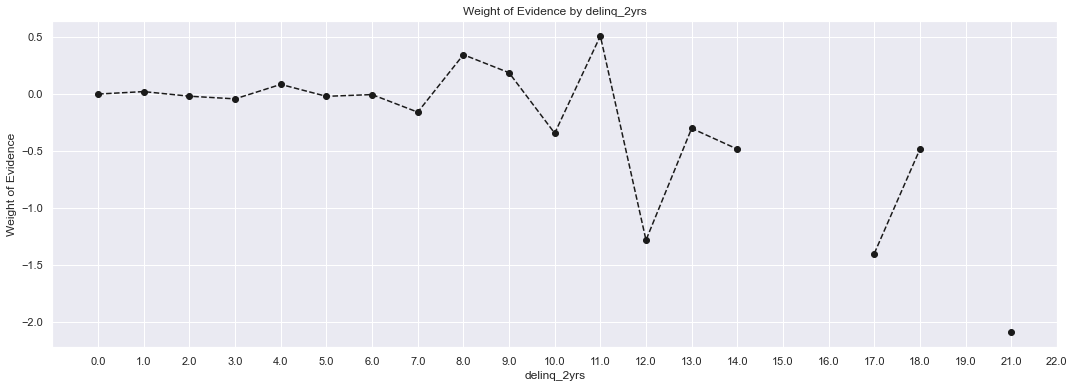

In [240]:
plot_by_woe(df_temp)

In [241]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [242]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193197,0.908384,0.517916,175497.0,17700.0,0.528394,0.432816,0.199530,NaN,NaN,inf
1,1.0,104204,0.884054,0.279346,92122.0,12082.0,0.277365,0.295440,-0.063131,0.024329,0.262660,inf
2,2.0,46304,0.863165,0.124130,39968.0,6336.0,0.120337,0.154933,-0.252696,0.020889,0.189566,inf
3,3.0,20004,0.842032,0.053626,16844.0,3160.0,0.050715,0.077271,-0.421105,0.021134,0.168409,inf
4,4.0,5749,0.846582,0.015412,4867.0,882.0,0.014654,0.021567,-0.386487,0.004550,0.034618,inf
5,5.0,2224,0.821493,0.005962,1827.0,397.0,0.005501,0.009708,-0.568033,0.025089,0.181547,inf
6,6.0,967,0.788004,0.002592,762.0,205.0,0.002294,0.005013,-0.781591,0.033489,0.213558,inf
7,7.0,160,0.637500,0.000429,102.0,58.0,0.000307,0.001418,-1.529998,0.150504,0.748407,inf
8,8.0,91,0.637363,0.000244,58.0,33.0,0.000175,0.000807,-1.530592,0.000137,0.000594,inf
9,9.0,45,0.688889,0.000121,31.0,14.0,0.000093,0.000342,-1.299598,0.051526,0.230994,inf


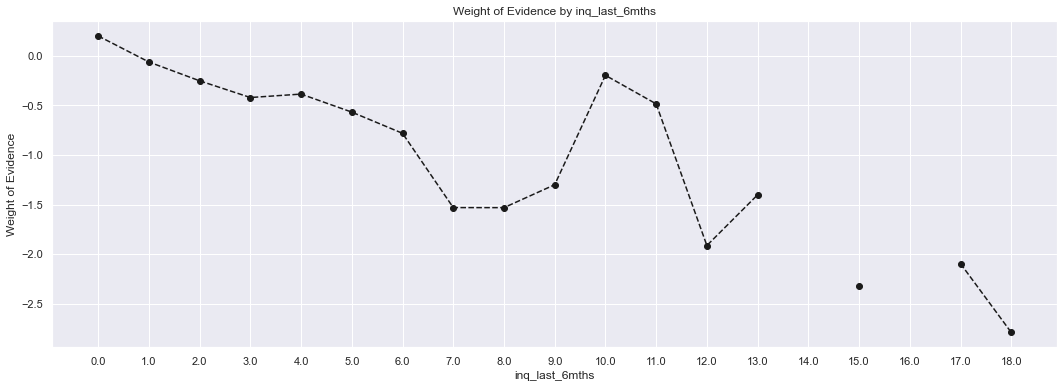

In [243]:
plot_by_woe(df_temp)

In [244]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [245]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,31,0.870968,0.000083,27.0,4.0,0.000081,0.000098,-0.184985,NaN,NaN,inf
1,1.0,113,0.858407,0.000303,97.0,16.0,0.000292,0.000391,-0.292405,0.012561,0.107420,inf
2,2.0,1462,0.846785,0.003919,1238.0,224.0,0.003727,0.005477,-0.384921,0.011622,0.092516,inf
3,3.0,4446,0.871345,0.011919,3874.0,572.0,0.011664,0.013987,-0.181624,0.024560,0.203297,inf
4,4.0,9990,0.889189,0.026781,8883.0,1107.0,0.026745,0.027069,-0.012042,0.017844,0.169582,inf
5,5.0,17202,0.890885,0.046115,15325.0,1877.0,0.046141,0.045898,0.005283,0.001696,0.017325,inf
6,6.0,24592,0.891509,0.065925,21924.0,2668.0,0.066010,0.065240,0.011725,0.000625,0.006442,inf
7,7.0,29992,0.890604,0.080401,26711.0,3281.0,0.080423,0.080230,0.002400,0.000905,0.009326,inf
8,8.0,33549,0.891472,0.089937,29908.0,3641.0,0.090048,0.089033,0.011340,0.000868,0.008940,inf
9,9.0,35230,0.887653,0.094443,31272.0,3958.0,0.094155,0.096784,-0.027543,0.003820,0.038883,inf


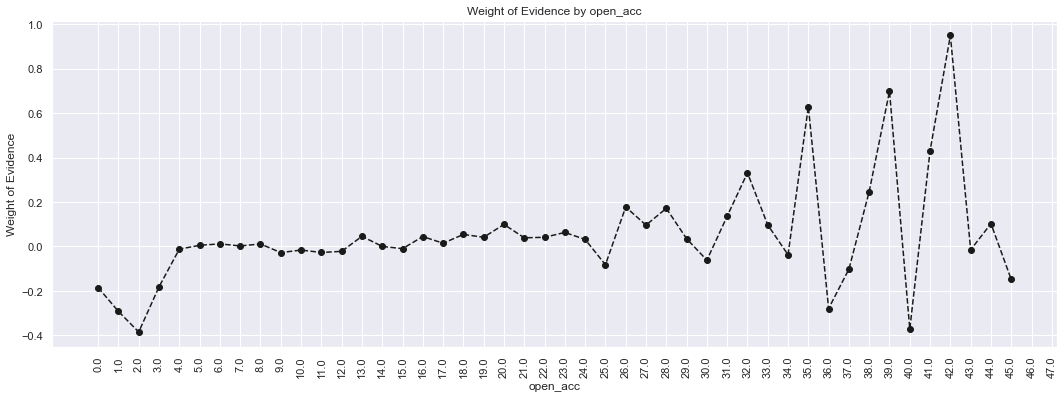

In [246]:
plot_by_woe(df_temp, 90)

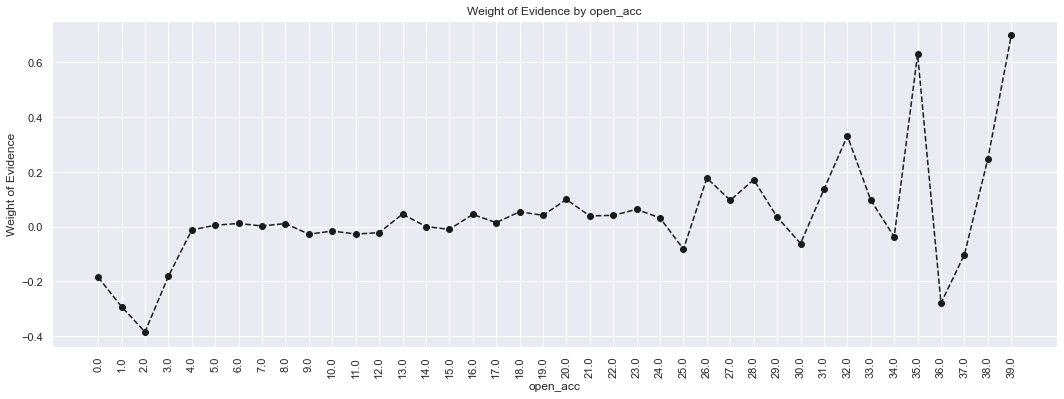

In [247]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [248]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [249]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323794,0.889553,0.868015,288032.0,35762.0,0.867219,0.874483,-0.008342,NaN,NaN,inf
1,1.0,42517,0.894136,0.113978,38016.0,4501.0,0.114460,0.110062,0.039180,0.004583,0.047522,inf
2,2.0,4557,0.901031,0.012216,4106.0,451.0,0.012363,0.011028,0.114210,0.006895,0.075030,inf
3,3.0,1289,0.912335,0.003456,1176.0,113.0,0.003541,0.002763,0.247959,0.011304,0.133749,inf
4,4.0,423,0.917258,0.001134,388.0,35.0,0.001168,0.000856,0.311130,0.004923,0.063171,inf
5,5.0,212,0.919811,0.000568,195.0,17.0,0.000587,0.000416,0.345259,0.002554,0.034129,inf
6,6.0,115,0.921739,0.000308,106.0,9.0,0.000319,0.000220,0.371687,0.001928,0.026428,inf
7,7.0,52,0.923077,0.000139,48.0,4.0,0.000145,0.000098,0.390379,0.001338,0.018692,inf
8,8.0,23,0.956522,0.000062,22.0,1.0,0.000066,0.000024,0.996515,0.033445,0.606136,inf
9,9.0,14,0.857143,0.000038,12.0,2.0,0.000036,0.000049,-0.302768,0.099379,1.299283,inf


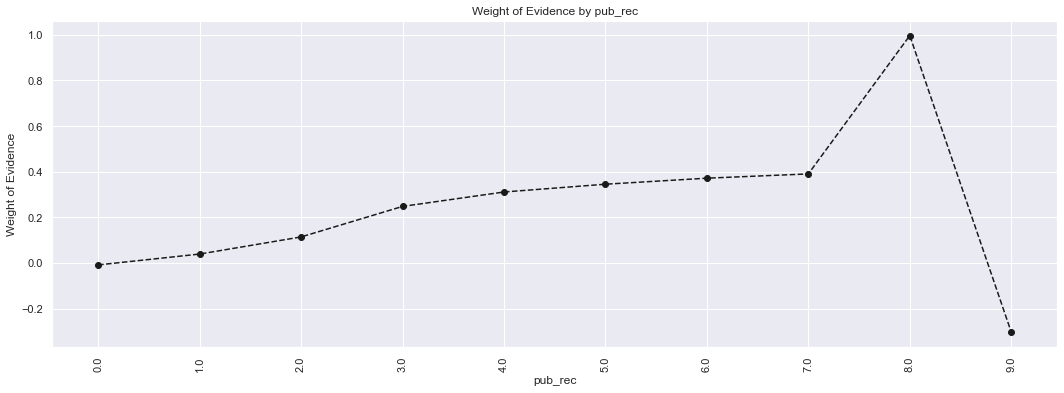

In [250]:
plot_by_woe(df_temp, 90)

In [251]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [252]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",474,0.799578,0.001271,379.0,95.0,0.001141,0.002323,-0.710868,NaN,NaN,inf
1,"(3.12, 6.24]",5970,0.859631,0.016004,5132.0,838.0,0.015452,0.020492,-0.282295,0.060053,0.428573,inf
2,"(6.24, 9.36]",14967,0.874724,0.040123,13092.0,1875.0,0.039418,0.045849,-0.151135,0.015093,0.131160,inf
3,"(9.36, 12.48]",25110,0.879092,0.067314,22074.0,3036.0,0.066461,0.074239,-0.110668,0.004368,0.040467,inf
4,"(12.48, 15.6]",33596,0.882069,0.090063,29634.0,3962.0,0.089223,0.096882,-0.082354,0.002977,0.028314,inf
5,"(15.6, 18.72]",38842,0.888085,0.104126,34495.0,4347.0,0.103859,0.106297,-0.023199,0.006016,0.059155,inf
6,"(18.72, 21.84]",40788,0.887516,0.109343,36200.0,4588.0,0.108992,0.112190,-0.028913,0.000569,0.005714,inf
7,"(21.84, 24.96]",40051,0.891488,0.107367,35705.0,4346.0,0.107502,0.106272,0.011507,0.003972,0.040420,inf
8,"(24.96, 28.08]",47501,0.895139,0.127339,42520.0,4981.0,0.128021,0.121800,0.049816,0.003651,0.038309,inf
9,"(28.08, 31.2]",29674,0.896104,0.079549,26591.0,3083.0,0.080061,0.075388,0.060142,0.000965,0.010326,inf


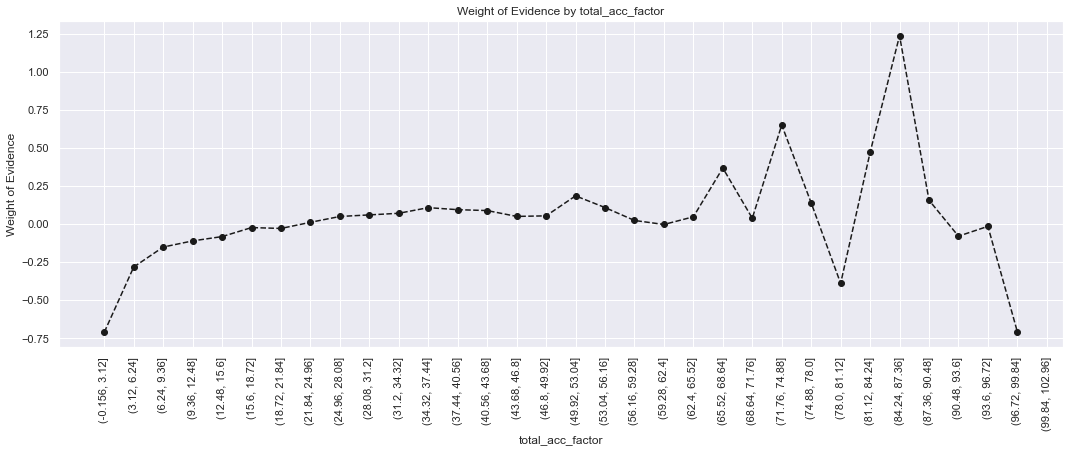

In [253]:
plot_by_woe(df_temp, 90)

In [254]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [255]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371657,0.890391,0.996325,330920.0,40737.0,0.996348,0.996136,0.000212,NaN,NaN,inf
1,1.0,1287,0.885781,0.003450,1140.0,147.0,0.003432,0.003595,-0.046177,0.004610,0.046389,inf
2,2.0,70,0.885714,0.000188,62.0,8.0,0.000187,0.000196,-0.046835,0.000067,0.000658,inf
3,3.0,10,0.800000,0.000027,8.0,2.0,0.000024,0.000049,-0.708233,0.085714,0.661398,inf
4,4.0,3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,inf,0.200000,inf,inf
5,5.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000024,-inf,1.000000,inf,inf


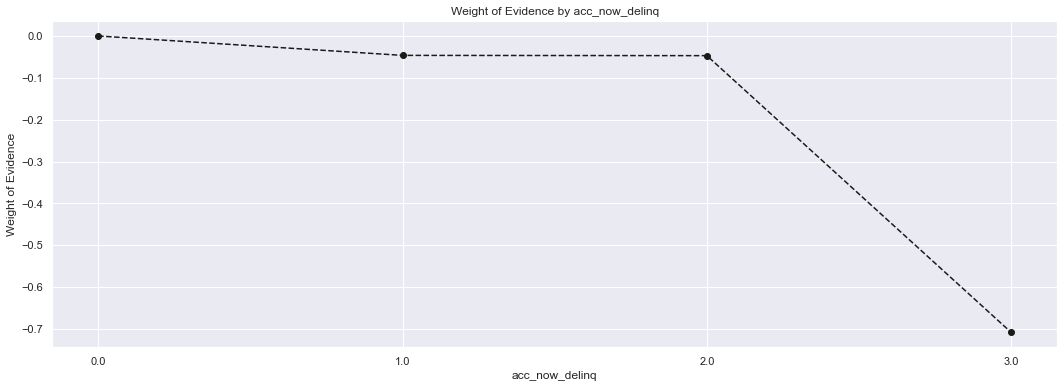

In [256]:
plot_by_woe(df_temp)

In [257]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [258]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19408,0.864592,0.052028,16780.0,2628.0,0.050522,0.064262,-0.240563,NaN,NaN,inf
1,"(5000.0, 9999.999]",52882,0.875232,0.141764,46284.0,6598.0,0.139354,0.161340,-0.146498,0.010640,0.094065,inf
2,"(9999.999, 14999.998]",59489,0.880633,0.159476,52388.0,7101.0,0.157732,0.173640,-0.096086,0.005402,0.050412,inf
3,"(14999.998, 19999.998]",51308,0.877037,0.137545,44999.0,6309.0,0.135485,0.154273,-0.129865,0.003597,0.033779,inf
4,"(19999.998, 24999.997]",41664,0.886593,0.111691,36939.0,4725.0,0.111217,0.115540,-0.038127,0.009556,0.091737,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


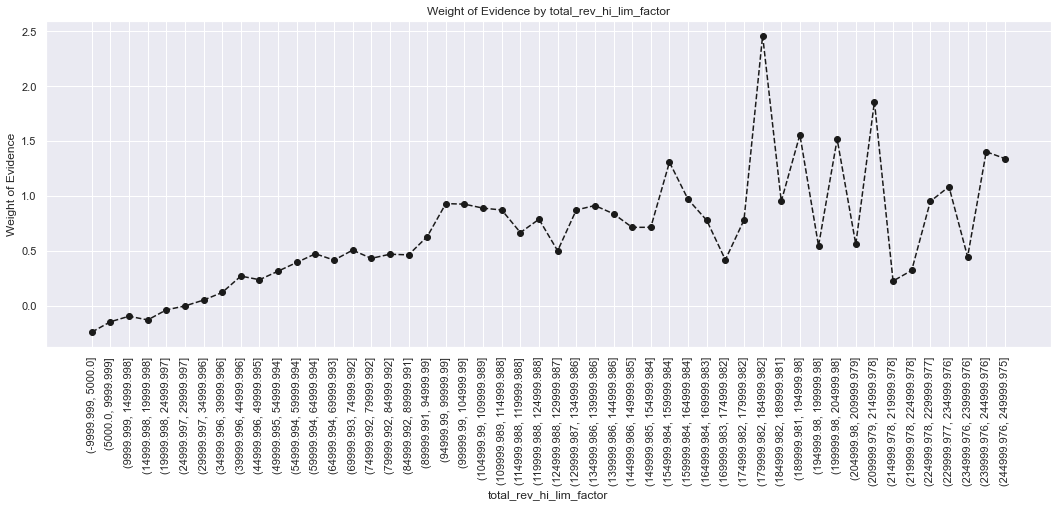

In [259]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [260]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [261]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1829,0.897758,0.004903,1642.0,187.0,0.004944,0.004573,0.078034,NaN,NaN,0.012982
1,"(43.556, 71.443]",4888,0.893617,0.013104,4368.0,520.0,0.013151,0.012715,0.033704,0.004141,0.044330,0.012982
2,"(71.443, 99.329]",6833,0.894483,0.018318,6112.0,721.0,0.018402,0.017631,0.042843,0.000866,0.009138,0.012982
3,"(99.329, 127.216]",9104,0.890158,0.024406,8104.0,1000.0,0.024400,0.024453,-0.002170,0.004324,0.045012,0.012982
4,"(127.216, 155.102]",10089,0.893944,0.027046,9019.0,1070.0,0.027155,0.026165,0.037147,0.003786,0.039317,0.012982
5,"(155.102, 182.988]",16723,0.894696,0.044830,14962.0,1761.0,0.045048,0.043061,0.045104,0.000752,0.007957,0.012982
6,"(182.988, 210.875]",17064,0.904301,0.045745,15431.0,1633.0,0.046460,0.039932,0.151432,0.009606,0.106328,0.012982
7,"(210.875, 238.761]",15022,0.898882,0.040270,13503.0,1519.0,0.040655,0.037144,0.090332,0.005420,0.061100,0.012982
8,"(238.761, 266.648]",18906,0.900032,0.050683,17016.0,1890.0,0.051232,0.046216,0.103050,0.001150,0.012718,0.012982
9,"(266.648, 294.534]",19962,0.891995,0.053513,17806.0,2156.0,0.053611,0.052720,0.016753,0.008037,0.086296,0.012982


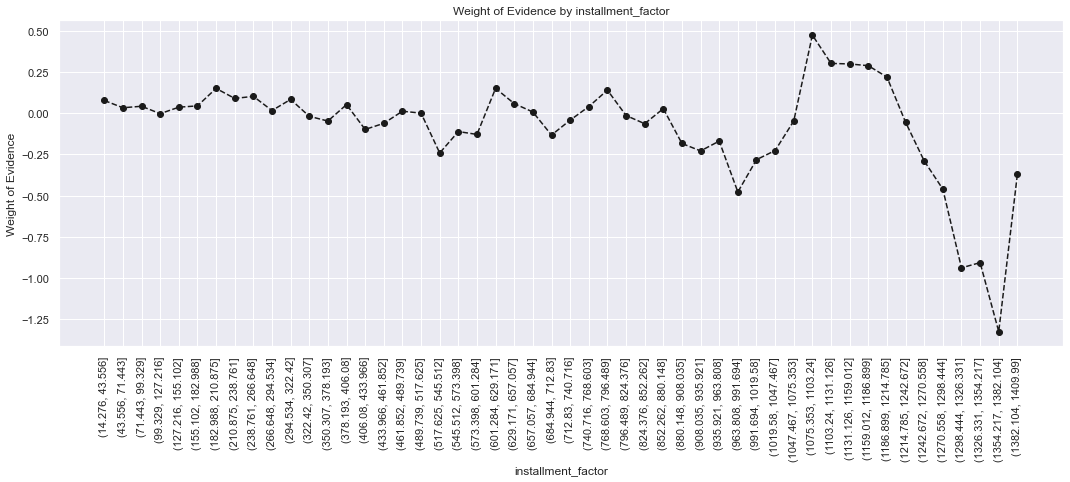

In [262]:
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [263]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 151858.08]",356763,0.888702,0.956397,317056.0,39707.0,0.954606,0.970950,-0.016977,NaN,NaN,inf
1,"(151858.08, 301820.16]",14654,0.926573,0.039284,13578.0,1076.0,0.040881,0.026311,0.440673,0.037871,0.457649,inf
2,"(301820.16, 451782.24]",1093,0.927722,0.002930,1014.0,79.0,0.003053,0.001932,0.457683,0.001149,0.017010,inf
3,"(451782.24, 601744.32]",304,0.944079,0.000815,287.0,17.0,0.000864,0.000416,0.731741,0.016357,0.274059,inf
4,"(601744.32, 751706.4]",89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.027665,0.056438,0.759406,inf
5,"(751706.4, 901668.48]",52,0.903846,0.000139,47.0,5.0,0.000142,0.000122,0.146182,0.016206,0.173847,inf
6,"(901668.48, 1051630.56]",27,0.962963,0.000072,26.0,1.0,0.000078,0.000024,1.163569,0.059117,1.017387,inf
7,"(1051630.56, 1201592.64]",18,1.000000,0.000048,18.0,0.0,0.000054,0.000000,inf,0.037037,inf,inf
8,"(1201592.64, 1351554.72]",7,1.000000,0.000019,7.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf
9,"(1351554.72, 1501516.8]",5,1.000000,0.000013,5.0,0.0,0.000015,0.000000,inf,0.000000,NaN,inf


In [264]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 76877.04]",245191,0.876978,0.657299,215027.0,30164.0,0.647412,0.737596,-0.130413,NaN,NaN,inf
1,"(76877.04, 151858.08]",111572,0.914468,0.299098,102029.0,9543.0,0.307193,0.233354,0.274922,0.037490,0.405335,inf
2,"(151858.08, 226839.12]",11821,0.926656,0.031689,10954.0,867.0,0.032981,0.021201,0.441893,0.012188,0.166972,inf
3,"(226839.12, 301820.16]",2833,0.926227,0.007595,2624.0,209.0,0.007900,0.005111,0.435593,0.000429,0.006300,inf
4,"(301820.16, 376801.2]",689,0.924528,0.001847,637.0,52.0,0.001918,0.001272,0.410998,0.001698,0.024595,inf
5,"(376801.2, 451782.24]",404,0.933168,0.001083,377.0,27.0,0.001135,0.000660,0.541881,0.008640,0.130882,inf
6,"(451782.24, 526763.28]",189,0.962963,0.000507,182.0,7.0,0.000548,0.000171,1.163569,0.029795,0.621688,inf
7,"(526763.28, 601744.32]",115,0.913043,0.000308,105.0,10.0,0.000316,0.000245,0.256848,0.049919,0.906721,inf
8,"(601744.32, 676725.36]",42,0.880952,0.000113,37.0,5.0,0.000111,0.000122,-0.093048,0.032091,0.349895,inf
9,"(676725.36, 751706.4]",47,0.893617,0.000126,42.0,5.0,0.000126,0.000122,0.033704,0.012665,0.126752,inf


In [265]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [266]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",13,0.769231,0.000037,10.0,3.0,0.000032,0.000076,-0.868381,NaN,NaN,0.049351
1,"(4658.08, 7420.16]",41,0.804878,0.000117,33.0,8.0,0.000106,0.000204,-0.655288,0.035647,0.213093,0.049351
2,"(7420.16, 10182.24]",304,0.858553,0.000866,261.0,43.0,0.000837,0.001095,-0.269034,0.053675,0.386254,0.049351
3,"(10182.24, 12944.32]",550,0.818182,0.001566,450.0,100.0,0.001443,0.002547,-0.568277,0.040371,0.299243,0.049351
4,"(12944.32, 15706.4]",1220,0.836066,0.003475,1020.0,200.0,0.003271,0.005095,-0.443114,0.017884,0.125163,0.049351
5,"(15706.4, 18468.48]",1504,0.837101,0.004284,1259.0,245.0,0.004037,0.006241,-0.435539,0.001035,0.007574,0.049351
6,"(18468.48, 21230.56]",2883,0.852237,0.008211,2457.0,426.0,0.007879,0.010851,-0.320097,0.015136,0.115442,0.049351
7,"(21230.56, 23992.64]",2564,0.839704,0.007303,2153.0,411.0,0.006904,0.010469,-0.416330,0.012534,0.096233,0.049351
8,"(23992.64, 26754.72]",7087,0.850289,0.020185,6026.0,1061.0,0.019324,0.027026,-0.335483,0.010586,0.080847,0.049351
9,"(26754.72, 29516.8]",5642,0.855016,0.016069,4824.0,818.0,0.015469,0.020837,-0.297858,0.004727,0.037625,0.049351


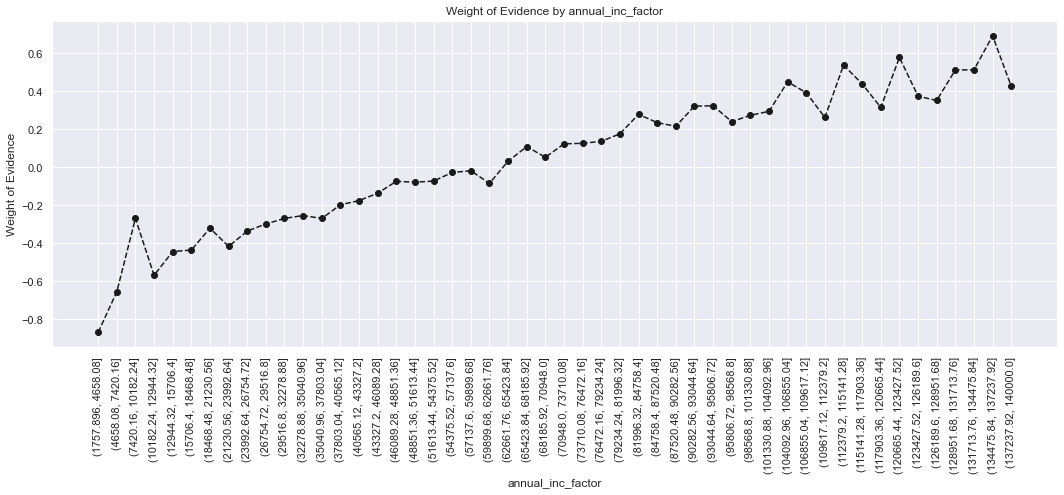

In [267]:
plot_by_woe(df_temp, 90)

In [268]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [269]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5287,0.869302,0.030602,4596.0,691.0,0.029816,0.037113,-0.218916,NaN,NaN,inf
1,"(3.76, 7.52]",11062,0.888085,0.064029,9824.0,1238.0,0.063732,0.066491,-0.042386,0.018783,0.176529,inf
2,"(7.52, 11.28]",13366,0.892114,0.077365,11924.0,1442.0,0.077355,0.077448,-0.001196,0.004029,0.041191,inf
3,"(11.28, 15.04]",13239,0.890400,0.076630,11788.0,1451.0,0.076473,0.077931,-0.018889,0.001715,0.017693,inf
4,"(15.04, 18.8]",9388,0.893375,0.054340,8387.0,1001.0,0.054409,0.053762,0.011966,0.002975,0.030854,inf
5,"(18.8, 22.56]",11774,0.892135,0.068150,10504.0,1270.0,0.068143,0.068210,-0.000978,0.001239,0.012944,inf
6,"(22.56, 26.32]",10878,0.896948,0.062964,9757.0,1121.0,0.063297,0.060207,0.050046,0.004813,0.051025,inf
7,"(26.32, 30.08]",10571,0.896415,0.061187,9476.0,1095.0,0.061474,0.058811,0.044290,0.000533,0.005756,inf
8,"(30.08, 33.84]",7550,0.898940,0.043701,6787.0,763.0,0.044030,0.040980,0.071789,0.002526,0.027498,inf
9,"(33.84, 37.6]",9764,0.898197,0.056516,8770.0,994.0,0.056894,0.053386,0.063637,0.000743,0.008151,inf


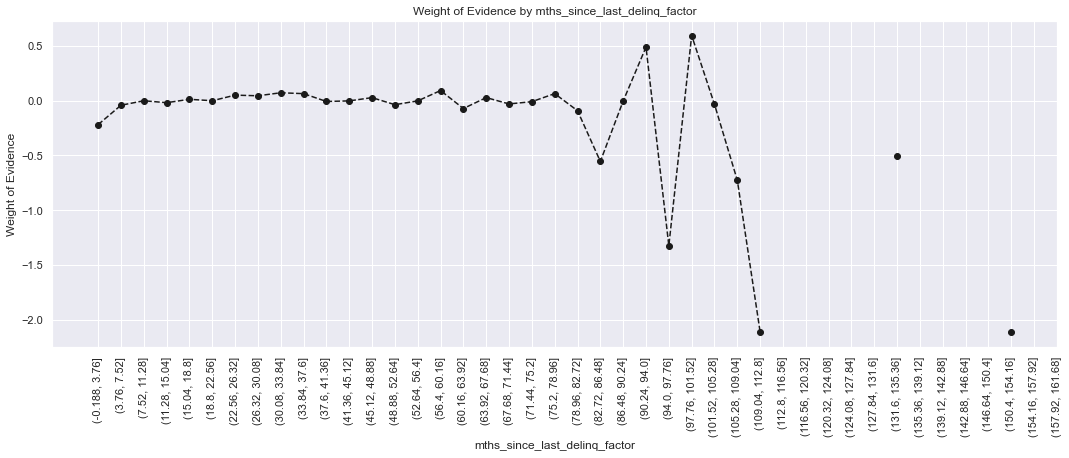

In [270]:
plot_by_woe(df_temp, 90)

In [271]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

In [272]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",738,0.882114,0.001978,651.0,87.0,0.001960,0.002127,-0.081926,NaN,NaN,0.027578
1,"(0.4, 0.8]",789,0.908745,0.002115,717.0,72.0,0.002159,0.001761,0.203882,0.026631,0.285808,0.027578
2,"(0.8, 1.2]",931,0.897959,0.002496,836.0,95.0,0.002517,0.002323,0.080224,0.010786,0.123658,0.027578
3,"(1.2, 1.6]",1058,0.895085,0.002836,947.0,111.0,0.002851,0.002714,0.049241,0.002874,0.030983,0.027578
4,"(1.6, 2.0]",1191,0.896725,0.003193,1068.0,123.0,0.003216,0.003008,0.066831,0.001640,0.017590,0.027578
5,"(2.0, 2.399]",1360,0.914706,0.003646,1244.0,116.0,0.003745,0.002837,0.277969,0.017980,0.211138,0.027578
6,"(2.399, 2.799]",1527,0.914211,0.004094,1396.0,131.0,0.004203,0.003203,0.271641,0.000495,0.006328,0.027578
7,"(2.799, 3.199]",1715,0.905539,0.004598,1553.0,162.0,0.004676,0.003961,0.165820,0.008672,0.105821,0.027578
8,"(3.199, 3.599]",1868,0.910064,0.005008,1700.0,168.0,0.005118,0.004108,0.219892,0.004525,0.054072,0.027578
9,"(3.599, 3.999]",2218,0.915239,0.005946,2030.0,188.0,0.006112,0.004597,0.284821,0.005175,0.064930,0.027578


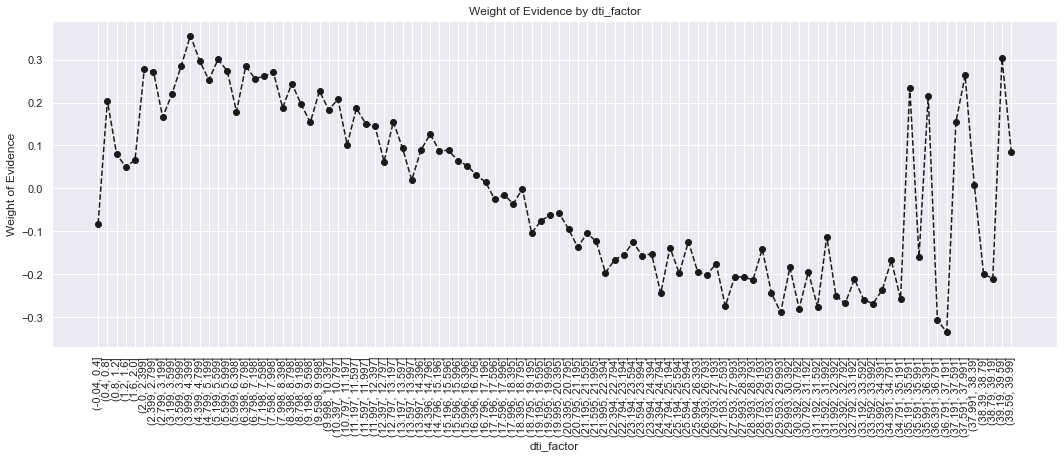

In [273]:
plot_by_woe(df_temp, 90)

In [274]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [275]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1345,0.893680,0.003634,1202.0,143.0,0.003647,0.003525,0.034202,NaN,NaN,0.026741
1,"(0.7, 1.4]",1666,0.890756,0.004501,1484.0,182.0,0.004503,0.004486,0.003794,0.002924,0.030408,0.026741
2,"(1.4, 2.1]",2043,0.907978,0.005520,1855.0,188.0,0.005629,0.004634,0.194503,0.017222,0.190708,0.026741
3,"(2.1, 2.8]",2586,0.911833,0.006987,2358.0,228.0,0.007155,0.005620,0.241528,0.003854,0.047025,0.026741
4,"(2.8, 3.5]",3115,0.907865,0.008416,2828.0,287.0,0.008581,0.007074,0.193147,0.003968,0.048381,0.026741
5,"(3.5, 4.2]",3863,0.917163,0.010437,3543.0,320.0,0.010751,0.007887,0.309713,0.009298,0.116565,0.026741
6,"(4.2, 4.9]",4584,0.915794,0.012385,4198.0,386.0,0.012738,0.009514,0.291831,0.001369,0.017882,0.026741
7,"(4.9, 5.6]",5304,0.915535,0.014330,4856.0,448.0,0.014735,0.011042,0.288482,0.000259,0.003349,0.026741
8,"(5.6, 6.3]",5905,0.910415,0.015954,5376.0,529.0,0.016312,0.013039,0.224016,0.005121,0.064466,0.026741
9,"(6.3, 7.0]",6577,0.913790,0.017769,6010.0,567.0,0.018236,0.013975,0.266125,0.003376,0.042109,0.026741


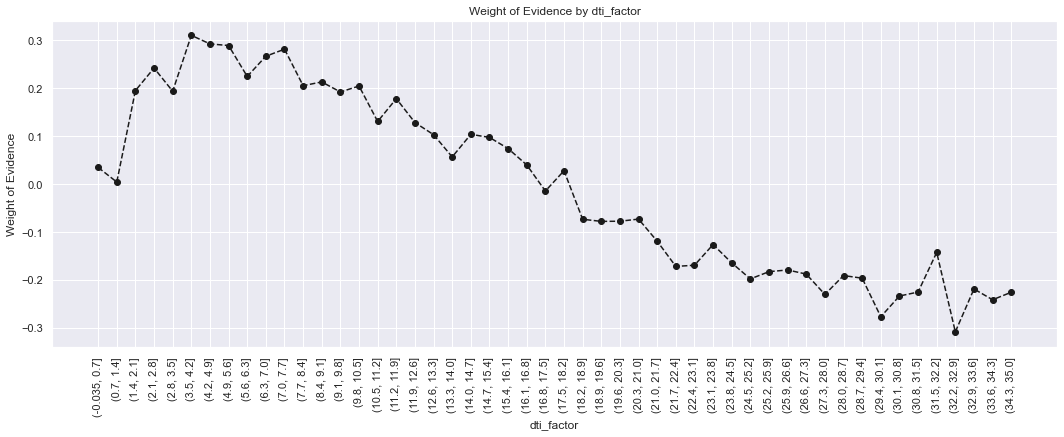

In [276]:
plot_by_woe(df_temp, 90)

In [277]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [278]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1067,0.758201,0.021229,809.0,258.0,0.018028,0.047902,-0.977239,NaN,NaN,inf
1,"(2.58, 5.16]",124,0.903226,0.002467,112.0,12.0,0.002496,0.002228,0.113514,0.145025,1.090753,inf
2,"(5.16, 7.74]",129,0.922481,0.002567,119.0,10.0,0.002652,0.001857,0.356461,0.019255,0.242946,inf
3,"(7.74, 10.32]",247,0.910931,0.004914,225.0,22.0,0.005014,0.004085,0.204980,0.011549,0.151480,inf
4,"(10.32, 12.9]",208,0.879808,0.004138,183.0,25.0,0.004078,0.004642,-0.129468,0.031123,0.334448,inf
5,"(12.9, 15.48]",307,0.908795,0.006108,279.0,28.0,0.006217,0.005199,0.178929,0.028987,0.308397,inf
6,"(15.48, 18.06]",339,0.896755,0.006745,304.0,35.0,0.006774,0.006498,0.041602,0.012040,0.137328,inf
7,"(18.06, 20.64]",252,0.928571,0.005014,234.0,18.0,0.005214,0.003342,0.444872,0.031816,0.403270,inf
8,"(20.64, 23.22]",451,0.915743,0.008973,413.0,38.0,0.009203,0.007055,0.265784,0.012829,0.179088,inf
9,"(23.22, 25.8]",318,0.899371,0.006327,286.0,32.0,0.006373,0.005941,0.070178,0.016372,0.195606,inf


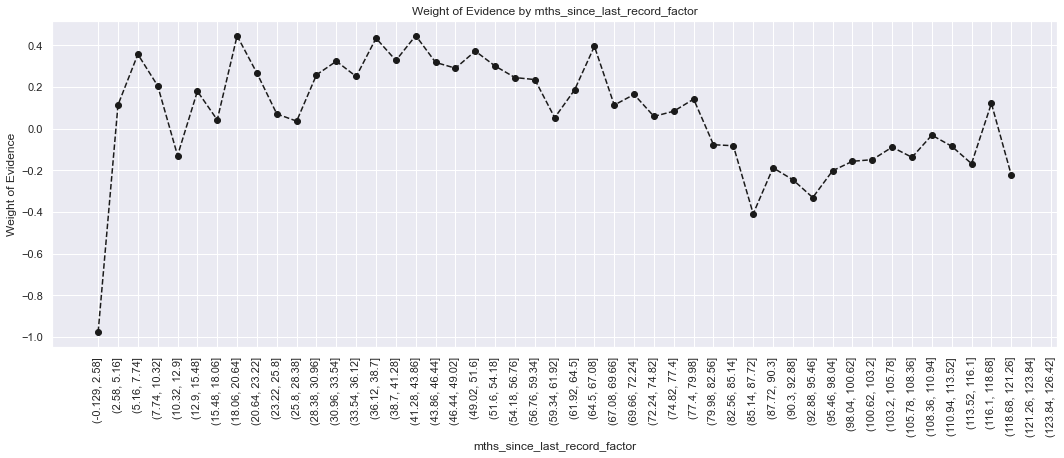

In [279]:
plot_by_woe(df_temp, 90)

In [280]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

### Preprocessing the Test Dataset

In [281]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Process loan_data_inputs_train, and then process loan_data_inputs_test
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
loan_data_inputs_train = df_inputs_prepr
# loan_data_inputs_test = df_inputs_prepr

In [282]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Save loan_data_inputs_train, and then Save loan_data_inputs_test
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# # loan_data_inputs_train.to_csv('./bkup/loan_data_inputs_train.csv')
# # loan_data_targets_train.to_csv('./bkup/loan_data_targets_train.csv')
# loan_data_inputs_test.to_csv('./bkup/loan_data_inputs_test.csv')
# loan_data_targets_test.to_csv('./bkup/loan_data_targets_test.csv')